# DATA MINING PROJECT - PROTEIN BLOCKS

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv("March_2024_PDB_01.txt", sep=r"\s+", header=None)

In [3]:
df1.columns = ['Protein_number', 'PB1', 'PB2', 'expected_frequency', 'AA1', 'AA2', 'S2_1', 'S2_2']

In [4]:
df1

,Protein_number,PB1,PB2,expected_frequency,AA1,AA2,S2_1,S2_2
0,1,p,f,0.941295,H,E,C,S
1,1,f,c,0.322290,W,P,S,S
2,1,o,l,0.412006,T,Q,C,C
3,3,b,i,0.298008,V,G,C,C
4,4,j,c,0.151741,G,R,E,E
...,...,...,...,...,...,...,...,...
5370,1720,n,p,0.202308,C,L,S,C
5371,1720,g,m,0.088315,S,E,T,T
5372,1720,h,o,0.194438,K,K,S,S
5373,1720,b,i,0.298008,P,N,C,C


In [5]:
df2 = pd.read_csv("March_2024_AF2_01.txt", sep=r"\s+", header=None)

In [6]:
df2.columns = ['Protein_number', 'res_number', 'PB1', 'PB2', 'AA1', 'AA2', 'S2_1', 'S2_2', 'expected_frequency', 'plDDT', 'RSA1', 'RSA2']

In [7]:
df2

,Protein_number,res_number,PB1,PB2,AA1,AA2,S2_1,S2_2,expected_frequency,plDDT,RSA1,RSA2
0,0,7,j,j,G,G,C,S,0.880055,60.180000,100.000000,100.000000
1,1,95,n,l,E,Q,T,T,0.736402,96.220001,89.762611,98.582039
2,1,219,i,d,G,N,S,C,0.040571,31.870001,100.000000,100.000000
3,1,222,d,i,T,V,C,C,0.021758,47.259998,100.000000,100.000000
4,1,223,i,d,V,P,C,C,0.040571,38.200001,100.000000,93.366096
...,...,...,...,...,...,...,...,...,...,...,...,...
671150,23508,14909273,j,d,G,L,C,C,0.623739,95.459999,1.531394,20.793951
671151,23508,14909291,f,d,C,D,P,S,0.047665,95.379997,11.473963,100.000000
671152,23508,14909390,j,d,G,P,S,P,0.623739,80.699997,65.849922,88.452087
671153,23508,14909434,g,f,L,T,C,C,0.430306,79.760002,60.491493,46.452702


In [8]:
df2['S2_1'].unique()

array(['C', 'T', 'S', 'E', 'G', 'H', 'B', 'P', 'I'], dtype=object)

In [9]:
df2['S2_2'].unique()

array(['S', 'T', 'C', 'E', 'B', 'G', 'P', 'H', 'I'], dtype=object)

### pairs of amino acids:

In [10]:
columns_without_aa = ['Protein_number', 'res_number', 'PB1', 'PB2', 'S2_1', 'S2_2', 'expected_frequency', 'plDDT', 'RSA1', 'RSA2']

In [11]:
df2_amino_acids = df2.drop(columns_without_aa, axis = 1)
df2_amino_acids['AA1_AA2'] = df2_amino_acids['AA1'] + df2_amino_acids['AA2']
value_counts = df2_amino_acids['AA1_AA2'].value_counts()
df2_amino_acids['AA1_AA2_count'] = df2_amino_acids['AA1_AA2'].map(value_counts)
df2_amino_acids

,AA1,AA2,AA1_AA2,AA1_AA2_count
0,G,G,GG,9088
1,E,Q,EQ,2066
2,G,N,GN,3307
3,T,V,TV,2404
4,V,P,VP,2249
...,...,...,...,...
671150,G,L,GL,5404
671151,C,D,CD,814
671152,G,P,GP,4966
671153,L,T,LT,2908


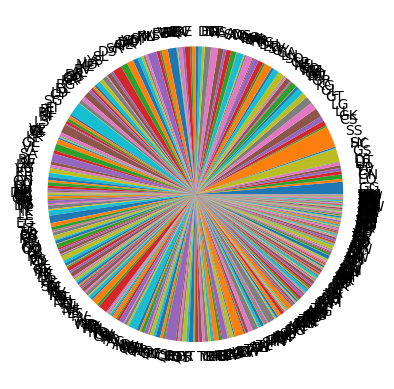

In [12]:
df2_amino_acids = df2_amino_acids.drop_duplicates()
total = df2_amino_acids['AA1_AA2_count'].sum()
labels = df2_amino_acids['AA1_AA2']
sizes = df2_amino_acids['AA1_AA2_count']/total

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

### pairs of secondary structures

In [13]:
columns_without_s2 = ['Protein_number', 'res_number', 'PB1', 'PB2', 'AA1', 'AA2', 'expected_frequency', 'plDDT', 'RSA1', 'RSA2']
df2_s2 = df2.drop(columns_without_s2, axis = 1)
df2_s2['S2_1_S2_2'] = df2_s2['S2_1'] + df2_s2['S2_2']
value_counts = df2_s2['S2_1_S2_2'].value_counts()
df2_s2['S2_1_S2_2_count'] = df2_s2['S2_1_S2_2'].map(value_counts)
df2_s2

,S2_1,S2_2,S2_1_S2_2,S2_1_S2_2_count
0,C,S,CS,11593
1,T,T,TT,19375
2,S,C,SC,24667
3,C,C,CC,530381
4,C,C,CC,530381
...,...,...,...,...
671150,C,C,CC,530381
671151,P,S,PS,338
671152,S,P,SP,780
671153,C,C,CC,530381


In [14]:
df2_s2 = df2_s2.drop_duplicates()

In [15]:
total = df2_s2['S2_1_S2_2_count'].sum()
total

np.int64(671155)

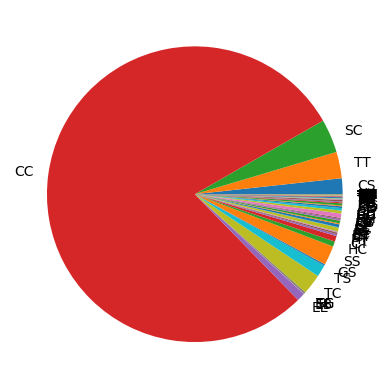

In [16]:
labels = df2_s2['S2_1_S2_2']
sizes = df2_s2['S2_1_S2_2_count']/total

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

In [17]:
columns_without_aa_s2 = ['Protein_number', 'res_number', 'PB1', 'PB2', 'expected_frequency', 'plDDT', 'RSA1', 'RSA2']
df2_aa_s2 = df2.drop(columns_without_aa_s2, axis = 1)
df2_aa_s2['AA1_AA2_S2_1_S2_2'] = df2['AA1'] + df2_aa_s2['AA2'] + df2_aa_s2['S2_1'] + df2_aa_s2['S2_2']
value_counts = df2_aa_s2['AA1_AA2_S2_1_S2_2'].value_counts()
df2_aa_s2['AA1_AA2_S2_1_S2_2_count'] = df2_aa_s2['AA1_AA2_S2_1_S2_2'].map(value_counts)
df2_aa_s2

,AA1,AA2,S2_1,S2_2,AA1_AA2_S2_1_S2_2,AA1_AA2_S2_1_S2_2_count
0,G,G,C,S,GGCS,164
1,E,Q,T,T,EQTT,41
2,G,N,S,C,GNSC,762
3,T,V,C,C,TVCC,2173
4,V,P,C,C,VPCC,2041
...,...,...,...,...,...,...
671150,G,L,C,C,GLCC,3482
671151,C,D,P,S,CDPS,1
671152,G,P,S,P,GPSP,116
671153,L,T,C,C,LTCC,2504


In [18]:
df2_aa_s2 = df2_aa_s2.drop_duplicates()

In [ ]:
total = df2_aa_s2['AA1_AA2_S2_1_S2_2_count'].sum()
labels = df2_aa_s2['AA1_AA2_S2_1_S2_2']
sizes = df2_aa_s2['AA1_AA2_S2_1_S2_2_count']/total

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()